In [1]:
import polars as pl
import polars.selectors as cs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_parquet("../0 - Data/2 - clean/clean_transactions.pq")

#### Just Seaborn Settings

In [2]:
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#1E2227",    # Plot Background
        "figure.facecolor": "#23272E",  # Main Background
        "axes.edgecolor": "#323842",    # Plot Border
        "grid.color": "#323842",        # Grid Color
        "text.color": "white",           # Text color
        "axes.labelcolor": "white",      # Label color
        "xtick.color": "white",          # X-axis tick color
        "ytick.color": "white",          # Y-axis tick color
        "axes.titlecolor": "white",      # Title color
    }
)

### Dataset Shape

In [3]:
print(f"Shape of the Dataset:\n\t- Rows: {df.shape[0]}\n\t- Columns: {df.shape[1]}")

Shape of the Dataset:
	- Rows: 13412376
	- Columns: 45


### Head, Tail & Sample

In [4]:
display(df.head(2))
display(df.tail(2))
display(df.sample())

User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
i64,i64,i32,i32,i32,f64,str,str,str,str,str,i64,str,i64,str,str,i64,date,i64,i32,i64,f64,date,i64,i32,str,i64,i64,i64,i64,str,str,str,str,str,i64,f64,f64,f64,f64,f64,i64,i64,datetime[μs],i32
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",0,"""Visa""","""Debit""",4344676511950444,2022-12-01,623,1,2,24295.0,2002-09-01,2008,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",1,"""Visa""","""Debit""",4956965974959986,2020-12-01,393,1,2,21968.0,2014-04-01,2014,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0


User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
i64,i64,i32,i32,i32,f64,str,str,str,str,str,i64,str,i64,str,str,i64,date,i64,i32,i64,f64,date,i64,i32,str,i64,i64,i64,i64,str,str,str,str,str,i64,f64,f64,f64,f64,f64,i64,i64,datetime[μs],i32
1999,1,2020,2,28,45.13,"""Chip Transaction""","""4751695835751691036""","""Merrimack""","""NH""","""3054.0""",5814,"""0""",0,"""Mastercard""","""Debit""",5589768928167462,2020-01-01,630,1,1,28074.0,2020-01-01,2020,0,"""Kenia Harris""",21,60,1998,11,"""Female""","""472 Ocean View Street""","""Unknown""","""Merrimack""","""NH""",3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,2020-02-28 23:10:00,0
1999,1,2020,2,28,45.13,"""Chip Transaction""","""4751695835751691036""","""Merrimack""","""NH""","""3054.0""",5814,"""0""",1,"""Visa""","""Credit""",4994011318343994,2020-12-01,120,1,1,14400.0,2017-05-01,2017,0,"""Kenia Harris""",21,60,1998,11,"""Female""","""472 Ocean View Street""","""Unknown""","""Merrimack""","""NH""",3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,2020-02-28 23:10:00,0


User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
i64,i64,i32,i32,i32,f64,str,str,str,str,str,i64,str,i64,str,str,i64,date,i64,i32,i64,f64,date,i64,i32,str,i64,i64,i64,i64,str,str,str,str,str,i64,f64,f64,f64,f64,f64,i64,i64,datetime[μs],i32
269,2,2018,4,8,10.63,"""Chip Transaction""","""-247541370517652406""","""Douglas""","""AZ""","""85608.0""",5411,"""0""",2,"""Mastercard""","""Debit""",5376527370326171,2023-09-01,565,1,1,19267.0,2012-07-01,2012,0,"""Magdalena Farhad""",36,68,1983,3,"""Female""","""28 Second Boulevard""","""6239""","""Lordsburg""","""NM""",88045,32.34,-108.7,15407.0,31414.0,42233.0,719,4,2018-04-08 13:11:00,0


### Dataframes by Data Types

In [5]:
numerical_df = df.select(cs.numeric())
categorical_df = df.select(cs.string())
datetime_df = df.select(cs.datetime())
date_df = df.select(cs.date())

display(numerical_df.head(2))
display(categorical_df.head(2))
display(datetime_df.head(2))
display(date_df.head(2))

User,Card,Year,Month,Day,Amount,MCC,CARD INDEX,Card Number,CVV,Has Chip,Cards Issued,Credit Limit,Year PIN last Changed,Card on Dark Web,Current Age,Retirement Age,Birth Year,Birth Month,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Is Fraud
i64,i64,i32,i32,i32,f64,i64,i64,i64,i64,i32,i64,f64,i64,i32,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,i32
0,0,2018,1,2,130.95,5912,0,4344676511950444,623,1,2,24295.0,2008,0,53,66,1966,11,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,0
0,0,2018,1,2,130.95,5912,1,4956965974959986,393,1,2,21968.0,2014,0,53,66,1966,11,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,0


Use Chip,Merchant Name,Merchant City,Merchant State,Zip,Errors?,Card Brand,Card Type,Person,Gender,Address,Apartment,City,State
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""","""0""","""Visa""","""Debit""","""Hazel Robinson""","""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA"""
"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""","""0""","""Visa""","""Debit""","""Hazel Robinson""","""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA"""


Datetime
datetime[μs]
2018-01-02 06:28:00
2018-01-02 06:28:00


Expires,Acct Open Date
date,date
2022-12-01,2002-09-01
2020-12-01,2014-04-01


### Create also PANDAS DF

For some statistics Pandas have better API

In [6]:
pandas_df = df.to_pandas()

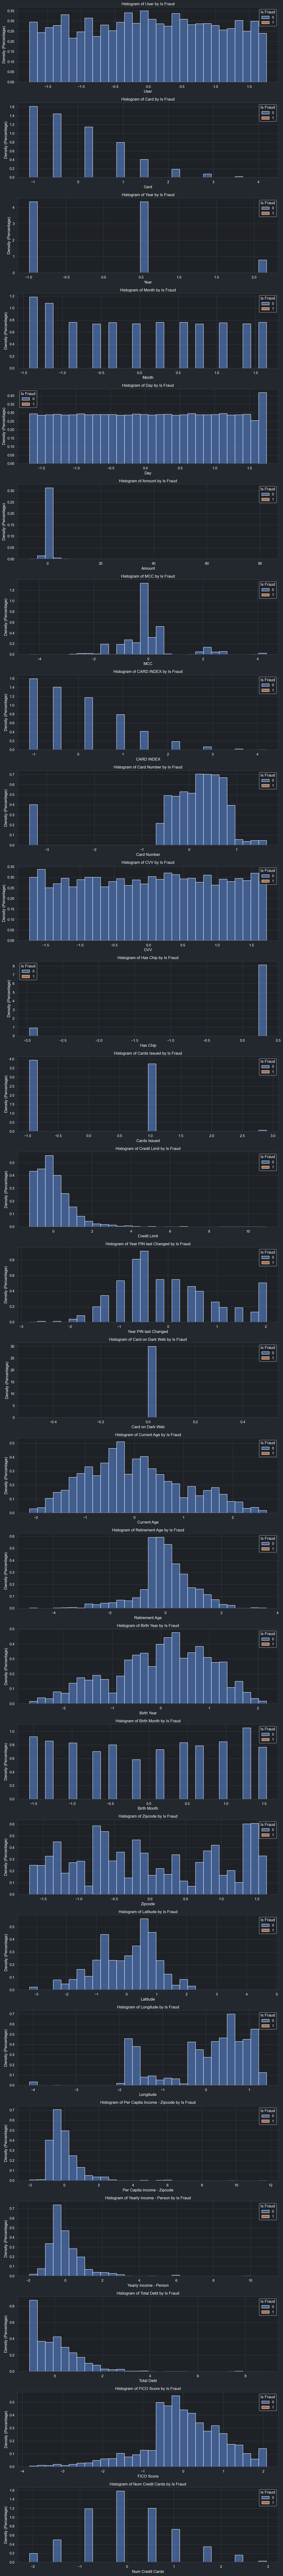

In [25]:
from sklearn.preprocessing import StandardScaler

def normalize_and_plot_histograms(df: pd.DataFrame, hue_column: str = 'Is Fraud', bins: int = 30):
    """
    Normalize numerical columns and plot histograms with hue using seaborn.
    Display the histograms with percentages on the y-axis.

    Parameters:
    - df: Pandas DataFrame with numerical columns.
    - hue_column: Column name to be used for hue (default is 'Is Fraud').
    - bins: Number of bins for the histogram (default is 30).
    """
    # Select numerical columns (excluding the hue column)
    numerical_cols = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns.tolist()
    if hue_column in numerical_cols:
        numerical_cols.remove(hue_column)
    
    # Normalize numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Create subplots for all numerical columns
    num_plots = len(numerical_cols)
    plt.figure(figsize=(12, num_plots * 4))  # Adjust the figure size dynamically
    
    for i, col in enumerate(numerical_cols):
        plt.subplot(num_plots, 1, i + 1)
        sns.histplot(data=df, x=col, hue=hue_column, multiple="stack", bins=bins, stat="density")
        plt.title(f"Histogram of {col} by {hue_column}")
        plt.xlabel(col)
        plt.ylabel('Density (Percentage)')
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

normalize_and_plot_histograms(pandas_df, "Is Fraud")

### Identify Static Variables

These variables can be immediately removed as they remain constant for every data row.

In [8]:
n_unique = pandas_df.nunique()
columns_to_drop = [key for key in n_unique.keys() if n_unique.get(key) == 1 ]

print("These columns should be dropped:", columns_to_drop)

These columns should be dropped: ['Card on Dark Web']


In [9]:
# Drop in Polars DF
df = df.drop(columns_to_drop)
# Keep the PANDAS DF Updated
pandas_df.drop(columns_to_drop, axis=1)

df.head(2)

User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
i64,i64,i32,i32,i32,f64,str,str,str,str,str,i64,str,i64,str,str,i64,date,i64,i32,i64,f64,date,i64,str,i64,i64,i64,i64,str,str,str,str,str,i64,f64,f64,f64,f64,f64,i64,i64,datetime[μs],i32
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",0,"""Visa""","""Debit""",4344676511950444,2022-12-01,623,1,2,24295.0,2002-09-01,2008,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",1,"""Visa""","""Debit""",4956965974959986,2020-12-01,393,1,2,21968.0,2014-04-01,2014,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0


### Data Balance

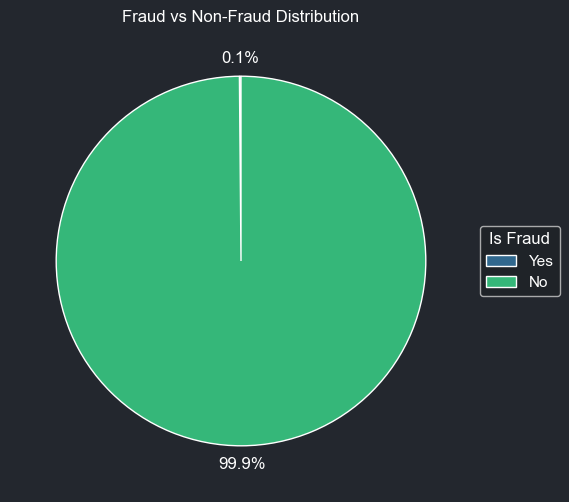

In [10]:
counts = df.group_by("Is Fraud").agg(pl.len()).to_pandas()
counts.columns = ["Is Fraud", "Count"]

plt.figure(figsize=(6, 6))
plt.pie(counts["Count"], autopct="%1.1f%%",pctdistance=1.1, startangle=90, colors=sns.color_palette("viridis", len(counts)))
plt.title("Fraud vs Non-Fraud Distribution")
plt.legend(
    labels=["Yes" if x == 1 else "No" for x in counts["Is Fraud"]],
    title="Is Fraud",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.show()

#### Resolution - 0

The dataset appears to be highly imbalanced, which is crucial to consider when creating the training data and selecting the model and its hyperparameters.

### Categorical Data - Fraud Correlations

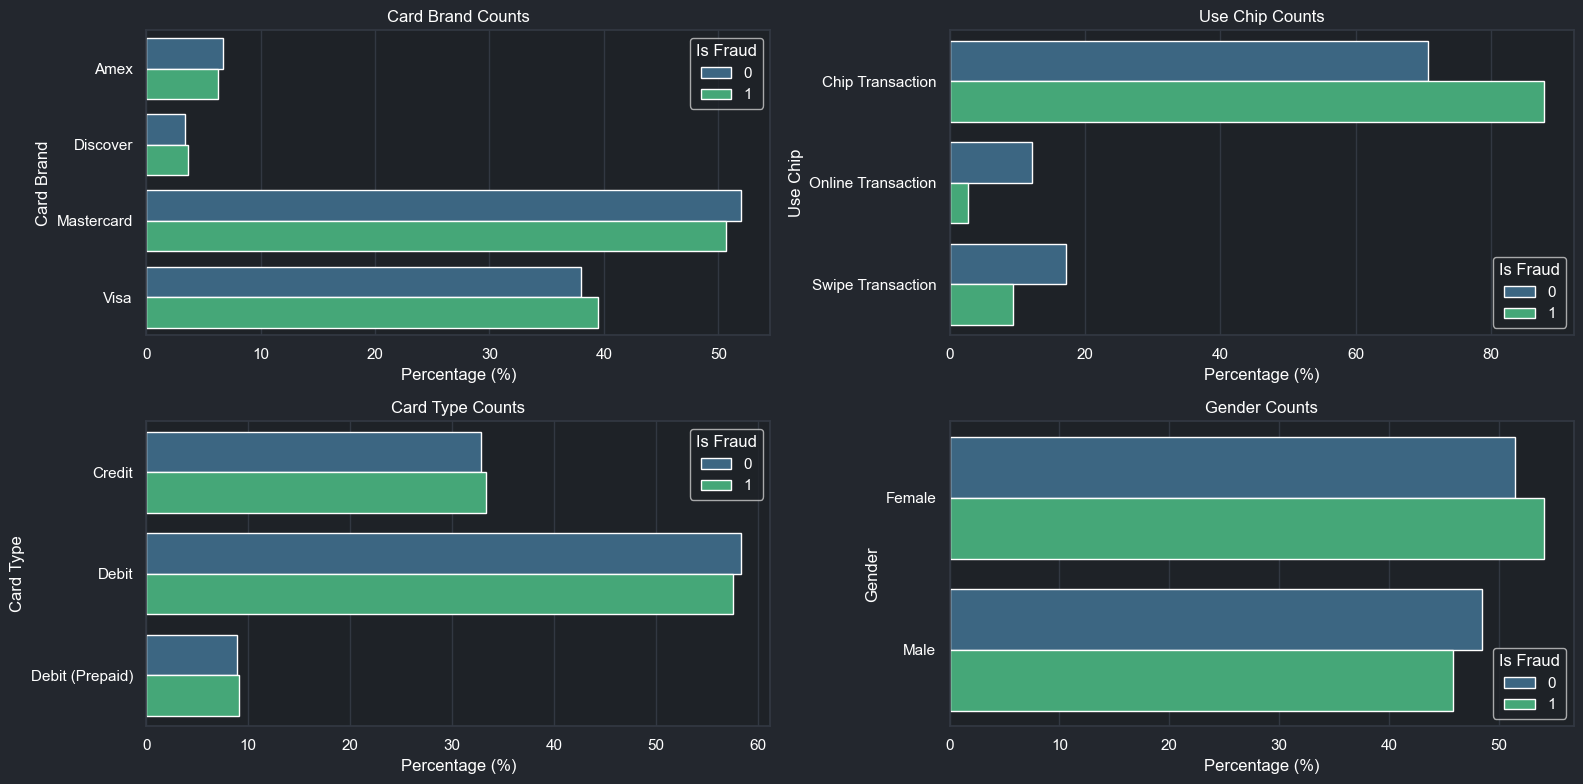

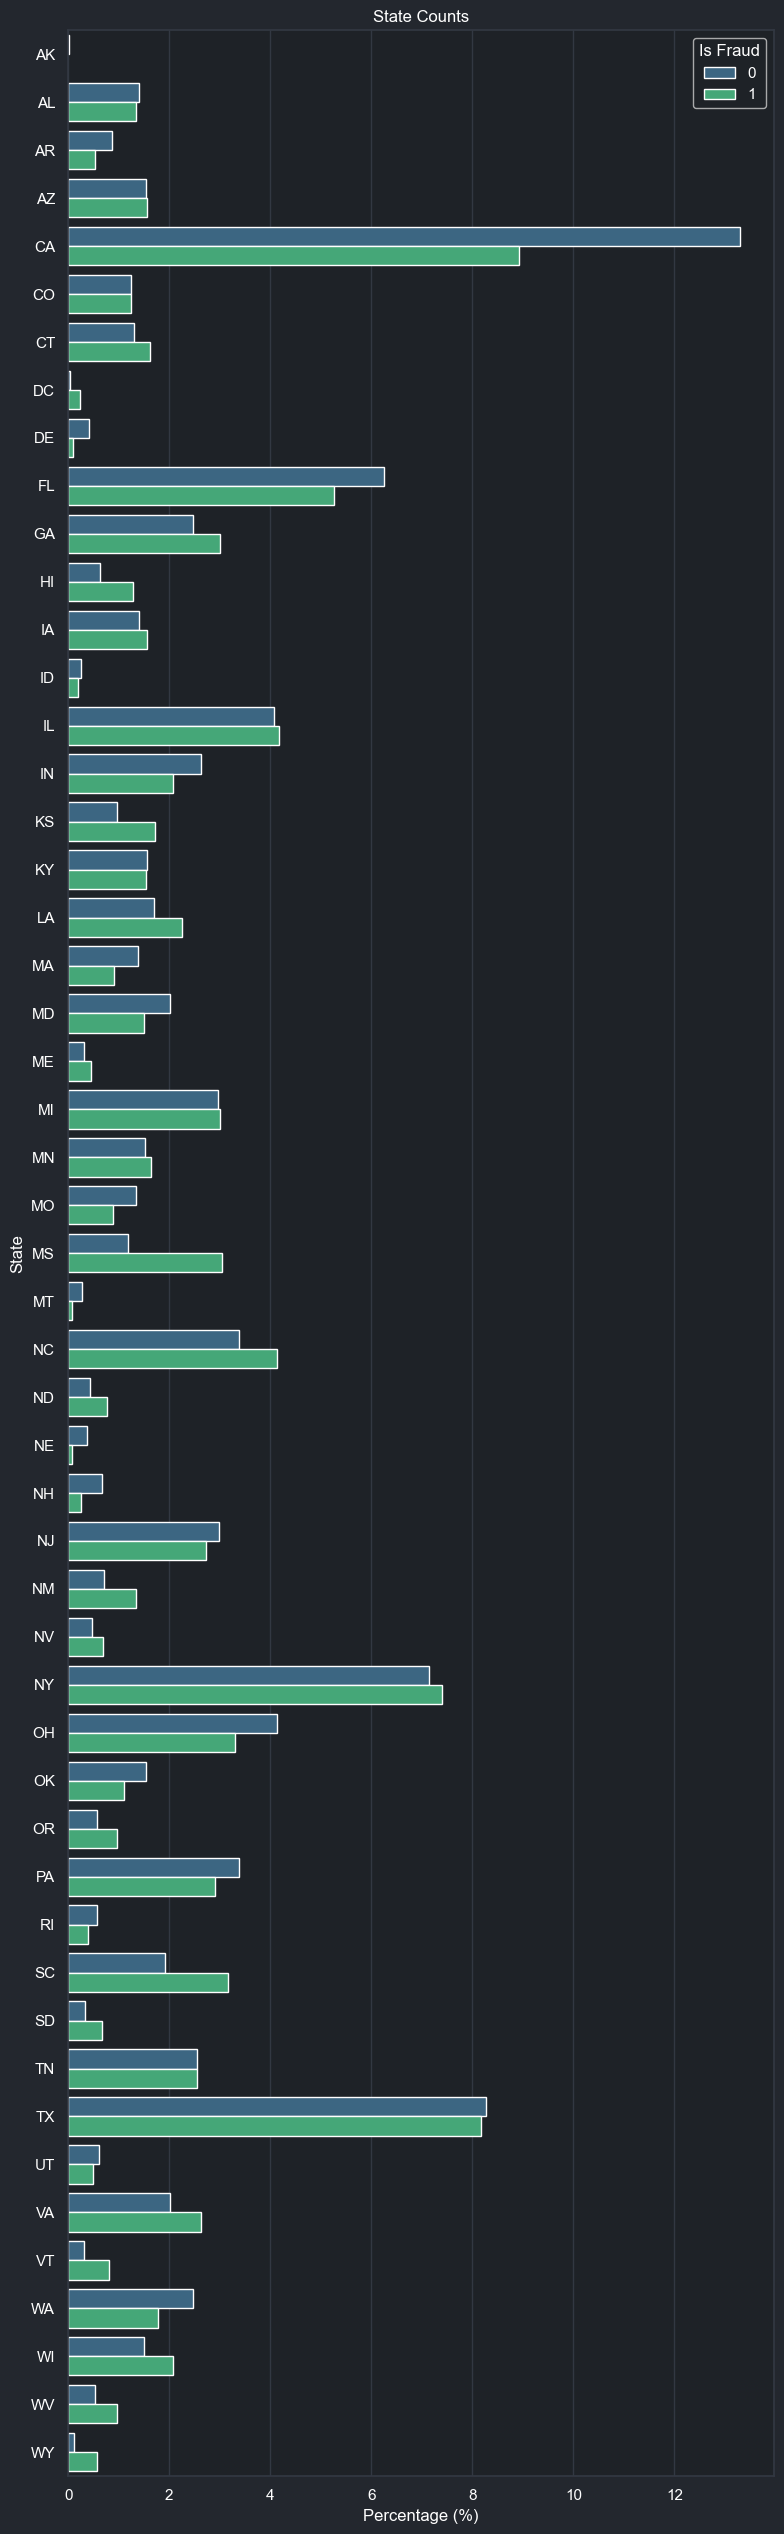

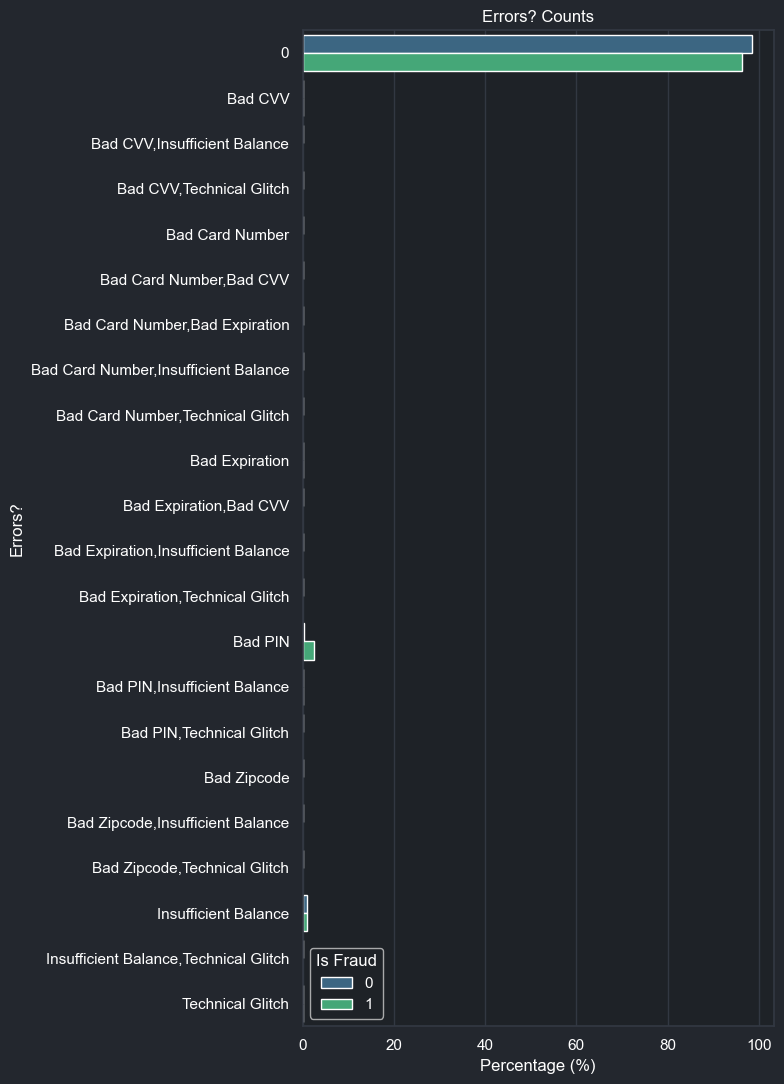

In [11]:
from utils.plots import plot_category_counts_for, plot_categorical_correlation_matrix

# Bar plots with all the categories specified and grouped by "Is Fraud"
plot_category_counts_for(df, ["Card Brand", "Use Chip", "Card Type", "Gender", "State", "Errors?"], group="Is Fraud", layout_columns=2, normalize=True)

# Plots below could be also used to study correlations in between the data

# Coocurences against "Is Fraud" column
# plot_categorical_correlation_matrix(df.to_pandas(), ["Card Brand", "Use Chip", "Card Type", "Gender", "State"], against="Is Fraud", normalize=True)

# Coocurences inn between the specified columns
# plot_categorical_correlation_matrix(df.to_pandas(), ["Card Brand", "Use Chip", "Card Type", "Gender", "State"], normalize=True)

#### Resolution - 1

The data indicates that the most common error in fraudulent transactions is a "Bad Pin," making it a valuable feature for fraud detection. Additionally, most fraudulent transactions involve the use of a chip, so this column is also beneficial. In contrast, attributes such as State, Gender, Card Type, and Card Brand don’t appear to have a significant impact on identifying fraud. While these columns may be useful for generating new features, they likely won’t carry much weight in their current form.

#### Numerical Data - Fraud Correlations

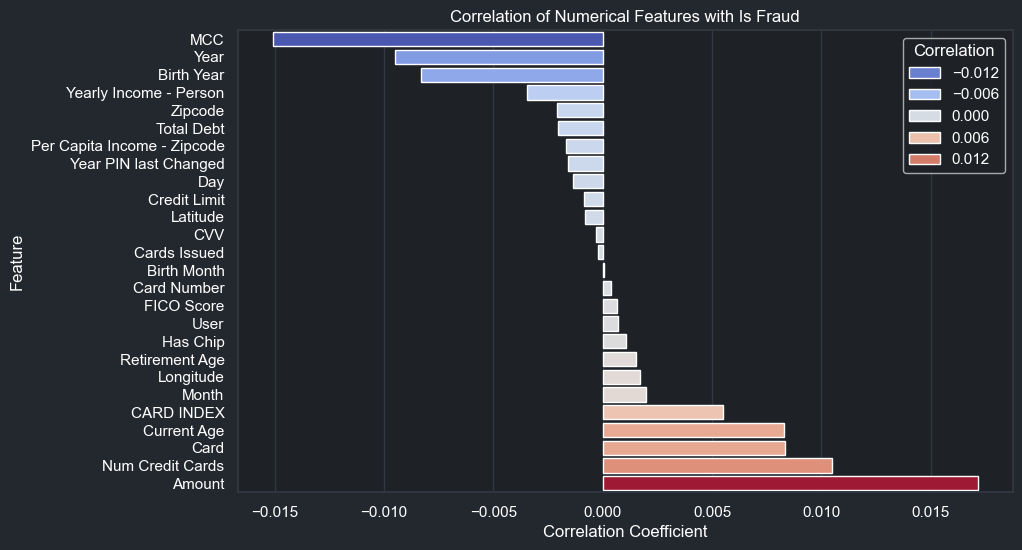

In [12]:
from utils.plots import plot_correlations_with_target

plot_correlations_with_target(df, target_column="Is Fraud")

#### Resolution - 2


The correlation chart indicates that the **"Amount"** and **"Num Credit Cards"** columns have the strongest positive correlations with fraudulent transactions, suggesting that higher transaction amounts and the number of credit cards associated with an account are significant predictors of fraud. These features could be valuable for the fraud detection model.

On the other hand, columns like **"MCC"** (Merchant Category Code), **"Year"**, and **"Birth Year"** exhibit negative correlations with fraud, indicating that lower values in these columns are associated with an increased likelihood of fraudulent activity. These features could also be useful in distinguishing fraud, albeit in an inverse manner.

Conversely, columns such as **"Cards Issued"**, **"Has Chip"**, **"Card Index"**, and **"Card Number"** show weak correlations (close to zero), suggesting they may not have much predictive power in identifying fraudulent transactions. These features might require further transformation or feature engineering to improve their utility in a fraud detection model.

#### 

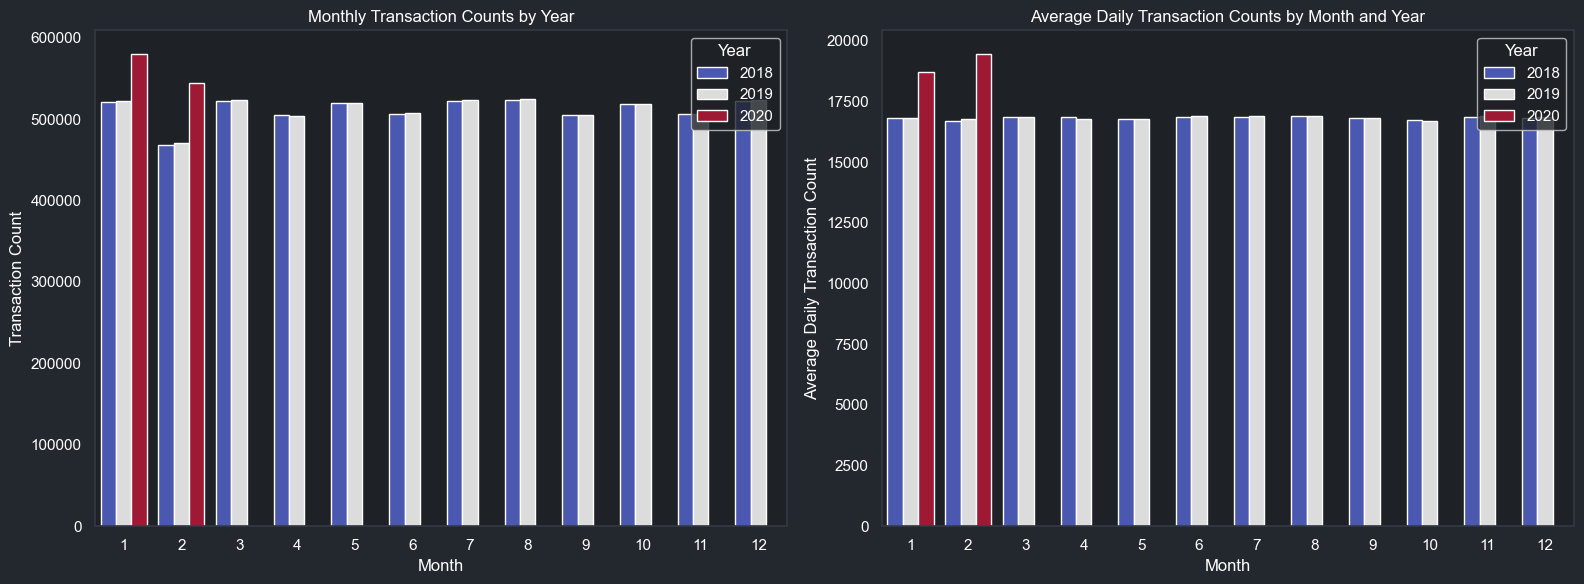

In [15]:
# Count daily transactions
daily_counts = df.group_by(["Year", "Month", "Day"]).agg(pl.len().alias("Transaction Count"))
# Calculate the average daily transaction count for each Month and Year
avg_daily_counts = daily_counts.group_by(["Year", "Month"]).agg(pl.mean("Transaction Count").alias("Avg Daily Transaction Count"))
# Convert Polars DataFrame to Pandas DataFrame
avg_daily_counts_df = avg_daily_counts.to_pandas()

# Count rows with the same Year and Month
monthly_counts = df.group_by(["Year", "Month"]).agg(pl.len().alias("Transaction Count"))
# Convert Polars DataFrame to Pandas DataFrame
monthly_counts_df = monthly_counts.to_pandas()


# Set up side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Monthly Transaction Counts by Year
sns.barplot(data=monthly_counts_df, x='Month', y='Transaction Count', hue='Year', palette='coolwarm', ax=axes[0])
axes[0].set_title('Monthly Transaction Counts by Year')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Transaction Count')
axes[0].legend(title='Year')
axes[0].grid(axis='y')

# Plot 2: Average Daily Transaction Counts by Month and Year
sns.barplot(data=avg_daily_counts_df, x='Month', y='Avg Daily Transaction Count', hue='Year', palette='coolwarm', ax=axes[1])
axes[1].set_title('Average Daily Transaction Counts by Month and Year')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Daily Transaction Count')
axes[1].legend(title='Year')
axes[1].grid(axis='y')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Resolution - 3

Transaction counts remained steady in 2018 and 2019, with similar daily averages. However, 2020 shows a noticeable increase in transaction volume, likely influenced by the COVID-19 pandemic. For example, contactless payment limits were raised, and contactless became considered the safer payment method compared to chip and PIN transactions.